In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor, plot_tree
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DT-BrainCancer.csv")

In [4]:
df.head()

,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status
0,1,Female,Meningioma,Infratentorial,90,6.11,0
1,2,Male,HG glioma,Supratentorial,90,19.35,1
2,3,Female,Meningioma,Infratentorial,70,7.95,0
3,4,Female,LG glioma,Supratentorial,80,7.61,1
4,5,Male,HG glioma,Supratentorial,90,5.06,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88 non-null     int64  
 1   sex         88 non-null     object 
 2   diagnosis   87 non-null     object 
 3   loc         88 non-null     object 
 4   ki          88 non-null     int64  
 5   gtv         88 non-null     float64
 6   status      88 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 4.9+ KB


In [6]:
df.describe()

,Unnamed: 0,ki,gtv,status
count,88.000000,88.000000,88.000000,88.000000
mean,44.500000,81.022727,8.660795,0.397727
std,25.547342,10.508866,8.657576,0.492233
min,1.000000,40.000000,0.010000,0.000000
25%,22.750000,80.000000,2.500000,0.000000
50%,44.500000,80.000000,6.510000,0.000000
75%,66.250000,90.000000,12.100000,1.000000
max,88.000000,100.000000,34.640000,1.000000


In [7]:
df.count()

,0
Unnamed: 0,88
sex,88
diagnosis,87
loc,88
ki,88
gtv,88
status,88


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
sex,0
diagnosis,1
loc,0
ki,0
gtv,0
status,0


In [9]:
df = df.dropna()


In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
sex,0
diagnosis,0
loc,0
ki,0
gtv,0
status,0


In [11]:
df.shape

(87, 7)

In [12]:
df = df.drop('Unnamed: 0', axis=1)

In [13]:
df.shape

(87, 6)

In [14]:
df.head()

,sex,diagnosis,loc,ki,gtv,status
0,Female,Meningioma,Infratentorial,90,6.11,0
1,Male,HG glioma,Supratentorial,90,19.35,1
2,Female,Meningioma,Infratentorial,70,7.95,0
3,Female,LG glioma,Supratentorial,80,7.61,1
4,Male,HG glioma,Supratentorial,90,5.06,1


In [15]:
un = df['sex'].unique()
print(un)

['Female' 'Male']


In [16]:
un = df['diagnosis'].unique()
print(un)

['Meningioma' 'HG glioma' 'LG glioma' 'Other']


In [17]:
un = df['loc'].unique()
print(un)

['Infratentorial' 'Supratentorial']


In [18]:
categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(exclude=['object']).columns


In [19]:
print(categorical)
print(numerical)

Index(['sex', 'diagnosis', 'loc'], dtype='object')
Index(['ki', 'gtv', 'status'], dtype='object')


In [20]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical))
encoded_df.index = df.index


In [21]:
df = df.drop(categorical, axis=1)
df = pd.concat([df, encoded_df], axis=1)


In [22]:
X = df.drop(columns=['status'])
y = df['status']

In [23]:
print(X.shape)
print(y.shape)

(87, 7)
(87,)


In [24]:
X.head()

,ki,gtv,sex_Male,diagnosis_LG glioma,diagnosis_Meningioma,diagnosis_Other,loc_Supratentorial
0,90,6.11,0.0,0.0,1.0,0.0,0.0
1,90,19.35,1.0,0.0,0.0,0.0,1.0
2,70,7.95,0.0,0.0,1.0,0.0,0.0
3,80,7.61,0.0,1.0,0.0,0.0,1.0
4,90,5.06,1.0,0.0,0.0,0.0,1.0


In [25]:
y.head()

,status
0,0
1,1
2,0
3,1
4,1


In [26]:
corr = df.corr()

target = corr['status'].sort_values(ascending=False)

print("Correlation of each feature with the target variable (status):")
print(target)

Correlation of each feature with the target variable (status):
status                  1.000000
gtv                     0.232762
loc_Supratentorial      0.206725
sex_Male                0.145578
diagnosis_LG glioma     0.029195
diagnosis_Other        -0.040328
ki                     -0.251298
diagnosis_Meningioma   -0.370416
Name: status, dtype: float64


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [29]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(60, 7)
(13, 7)
(14, 7)
(60,)
(13,)
(14,)


## Decision Tree Model

In [30]:
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

best_dt = grid_search_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)


Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


## XGBOOST MODEL

In [31]:
xgb_model = xgb.XGBClassifier(random_state=42)

param_grid_xgb = {
    'learning_rate': [0.001,0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)


Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


## Accuracy,Confusion Matrix, Precision, Recall, F1 Score, Precision-Recall Curve, Function to plot Precision-Recall Curve

In [32]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def confusion_matrix_manual(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

def precision_manual(y_true, y_pred):
    tp, tn, fp, fn = confusion_matrix_manual(y_true, y_pred)
    return tp / (tp + fp) if tp + fp > 0 else 0

def recall_manual(y_true, y_pred):
    tp, tn, fp, fn = confusion_matrix_manual(y_true, y_pred)
    return tp / (tp + fn) if tp + fn > 0 else 0

def f1_score_manual(y_true, y_pred):
    precision = precision_manual(y_true, y_pred)
    recall = recall_manual(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

def precision_recall_curve_manual(y_true, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    return precision, recall, thresholds

def plot_precision_recall_curve(precision, recall, label):
    plt.plot(recall, precision, label=label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()


## Predictions

In [33]:
y_train_pred_dt = best_dt.predict(X_train)
y_val_pred_dt = best_dt.predict(X_val)
y_test_pred_dt = best_dt.predict(X_test)

y_train_pred_xgb = best_xgb.predict(X_train)
y_val_pred_xgb = best_xgb.predict(X_val)
y_test_pred_xgb = best_xgb.predict(X_test)

y_test_prob_dt = best_dt.predict_proba(X_test)[:, 1]
y_test_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]


## Calculate Metrices Decision Tree

Decision Tree Accuracy (Train): 1.0
Decision Tree Accuracy (Validation): 0.8461538461538461
Decision Tree Accuracy (Test): 0.8571428571428571
Confusion Matrix (Test): TP=5, TN=7, FP=2, FN=0
Precision (Test): 0.7142857142857143
Recall (Test): 1.0
F1 Score (Test): 0.8333333333333333


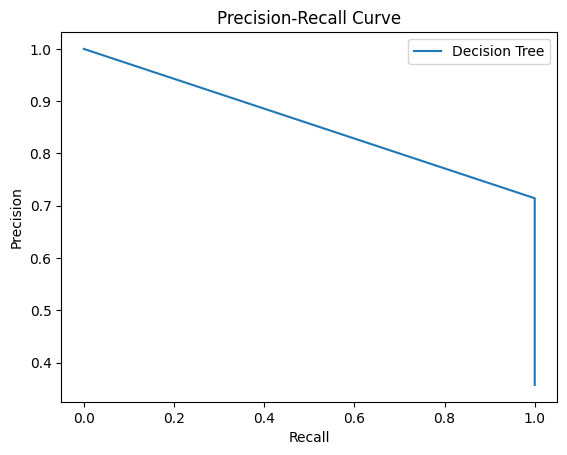

In [34]:
acc_train_dt = accuracy(y_train, y_train_pred_dt)
acc_val_dt = accuracy(y_val, y_val_pred_dt)
acc_test_dt = accuracy(y_test, y_test_pred_dt)

tp_dt, tn_dt, fp_dt, fn_dt = confusion_matrix_manual(y_test, y_test_pred_dt)
prec_dt = precision_manual(y_test, y_test_pred_dt)
rec_dt = recall_manual(y_test, y_test_pred_dt)
f1_dt = f1_score_manual(y_test, y_test_pred_dt)

print(f"Decision Tree Accuracy (Train): {acc_train_dt}")
print(f"Decision Tree Accuracy (Validation): {acc_val_dt}")
print(f"Decision Tree Accuracy (Test): {acc_test_dt}")
print(f"Confusion Matrix (Test): TP={tp_dt}, TN={tn_dt}, FP={fp_dt}, FN={fn_dt}")
print(f"Precision (Test): {prec_dt}")
print(f"Recall (Test): {rec_dt}")
print(f"F1 Score (Test): {f1_dt}")

prec_dt_curve, rec_dt_curve, _ = precision_recall_curve_manual(y_test, y_test_prob_dt)
plot_precision_recall_curve(prec_dt_curve, rec_dt_curve, label='Decision Tree')


## Calculate Metrices for XGBOOST

XGBoost Accuracy (Train): 0.7833333333333333
XGBoost Accuracy (Validation): 0.9230769230769231
XGBoost Accuracy (Test): 0.8571428571428571
Confusion Matrix (Test): TP=4, TN=8, FP=1, FN=1
Precision (Test): 0.8
Recall (Test): 0.8
F1 Score (Test): 0.8000000000000002


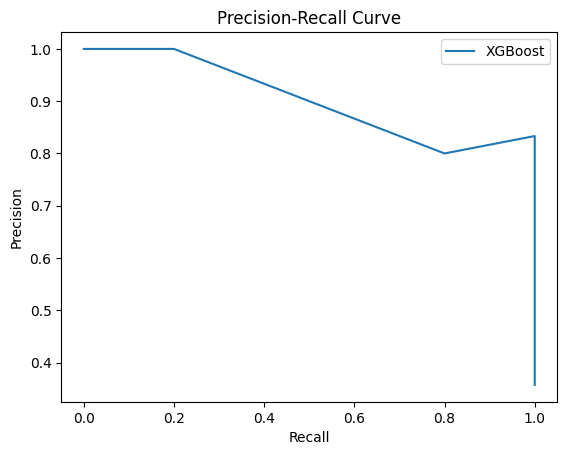

In [35]:
acc_train_xgb = accuracy(y_train, y_train_pred_xgb)
acc_val_xgb = accuracy(y_val, y_val_pred_xgb)
acc_test_xgb = accuracy(y_test, y_test_pred_xgb)

tp_xgb, tn_xgb, fp_xgb, fn_xgb = confusion_matrix_manual(y_test, y_test_pred_xgb)
prec_xgb = precision_manual(y_test, y_test_pred_xgb)
rec_xgb = recall_manual(y_test, y_test_pred_xgb)
f1_xgb = f1_score_manual(y_test, y_test_pred_xgb)

print(f"XGBoost Accuracy (Train): {acc_train_xgb}")
print(f"XGBoost Accuracy (Validation): {acc_val_xgb}")
print(f"XGBoost Accuracy (Test): {acc_test_xgb}")
print(f"Confusion Matrix (Test): TP={tp_xgb}, TN={tn_xgb}, FP={fp_xgb}, FN={fn_xgb}")
print(f"Precision (Test): {prec_xgb}")
print(f"Recall (Test): {rec_xgb}")
print(f"F1 Score (Test): {f1_xgb}")

prec_xgb_curve, rec_xgb_curve, _ = precision_recall_curve_manual(y_test, y_test_prob_xgb)
plot_precision_recall_curve(prec_xgb_curve, rec_xgb_curve, label='XGBoost')
